# Bag-of-words analysis of model cards

## Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import json
import ast

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set style for plots
plt.style.use('seaborn')
sns.set_palette('husl')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjaminlaufer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjaminlaufer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benjaminlaufer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_10250/2974015409.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Load the dataset
df = pd.read_csv('DeepHermes-3-Mistral-24B-Preview_finetunes_20250418_022302.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (5, 13)


,Unnamed: 0,model_id,card,metadata,depth,children,children_count,adapters,adapters_count,quantized,quantized_count,merges,merges_count
0,0,NousResearch/DeepHermes-3-Mistral-24B-Preview,---\nlanguage:\n- en\nlicense: apache-2.0\ntag...,"{""modelId"": ""NousResearch/DeepHermes-3-Mistral...",0,['https://huggingface.co/mlx-community/DeepHer...,3,[],0,['https://huggingface.co/bartowski/NousResearc...,9,['https://huggingface.co/Kaoeiri/MS-Hempantheo...,2
1,1,mlx-community/DeepHermes-3-Mistral-24B-Preview...,---\nlanguage:\n- en\nlicense: apache-2.0\ntag...,"{""modelId"": ""mlx-community/DeepHermes-3-Mistra...",1,[],0,[],0,[],0,[],0
2,2,Jarrodbarnes/DeepHermes-3-Mistral-24B-Preview-...,---\nlanguage:\n- en\nlicense: apache-2.0\ntag...,"{""modelId"": ""Jarrodbarnes/DeepHermes-3-Mistral...",1,[],0,[],0,[],0,[],0
3,3,AlSamCur123/DeepHermes-3-Mistral-24BContinuedFine,---\nbase_model: NousResearch/DeepHermes-3-Mis...,"{""modelId"": ""AlSamCur123/DeepHermes-3-Mistral-...",1,['https://huggingface.co/AlSamCur123/DeepHerme...,1,[],0,['https://huggingface.co/AlSamCur123/DeepHerme...,1,[],0
4,4,AlSamCur123/DeepHermes-3-Mistral-24ContinuedFine,---\nbase_model: AlSamCur123/DeepHermes-3-Mist...,"{""modelId"": ""AlSamCur123/DeepHermes-3-Mistral-...",2,[],0,[],0,[],0,[],0


## Text Preprocessing

In [3]:
def preprocess_text(text):
    """Preprocess text for bag-of-words analysis."""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [4]:
df

,Unnamed: 0,model_id,card,metadata,depth,children,children_count,adapters,adapters_count,quantized,quantized_count,merges,merges_count
0,0,NousResearch/DeepHermes-3-Mistral-24B-Preview,---\nlanguage:\n- en\nlicense: apache-2.0\ntag...,"{""modelId"": ""NousResearch/DeepHermes-3-Mistral...",0,['https://huggingface.co/mlx-community/DeepHer...,3,[],0,['https://huggingface.co/bartowski/NousResearc...,9,['https://huggingface.co/Kaoeiri/MS-Hempantheo...,2
1,1,mlx-community/DeepHermes-3-Mistral-24B-Preview...,---\nlanguage:\n- en\nlicense: apache-2.0\ntag...,"{""modelId"": ""mlx-community/DeepHermes-3-Mistra...",1,[],0,[],0,[],0,[],0
2,2,Jarrodbarnes/DeepHermes-3-Mistral-24B-Preview-...,---\nlanguage:\n- en\nlicense: apache-2.0\ntag...,"{""modelId"": ""Jarrodbarnes/DeepHermes-3-Mistral...",1,[],0,[],0,[],0,[],0
3,3,AlSamCur123/DeepHermes-3-Mistral-24BContinuedFine,---\nbase_model: NousResearch/DeepHermes-3-Mis...,"{""modelId"": ""AlSamCur123/DeepHermes-3-Mistral-...",1,['https://huggingface.co/AlSamCur123/DeepHerme...,1,[],0,['https://huggingface.co/AlSamCur123/DeepHerme...,1,[],0
4,4,AlSamCur123/DeepHermes-3-Mistral-24ContinuedFine,---\nbase_model: AlSamCur123/DeepHermes-3-Mist...,"{""modelId"": ""AlSamCur123/DeepHermes-3-Mistral-...",2,[],0,[],0,[],0,[],0


## Bag-of-Words Analysis

In [5]:
# Create bag-of-words representation
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['card'])

# Get feature names and counts
feature_names = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1

# Create DataFrame of word frequencies
word_freq = pd.DataFrame({
    'word': feature_names,
    'count': word_counts
}).sort_values('count', ascending=False)

# Display top 20 words
word_freq.head(20)

,word,count
493,the,82
503,to,46
53,and,44
143,deephermes,37
313,mistral,37
347,of,33
318,model,33
384,preview,31
570,you,30
12,24b,28


## Visualization

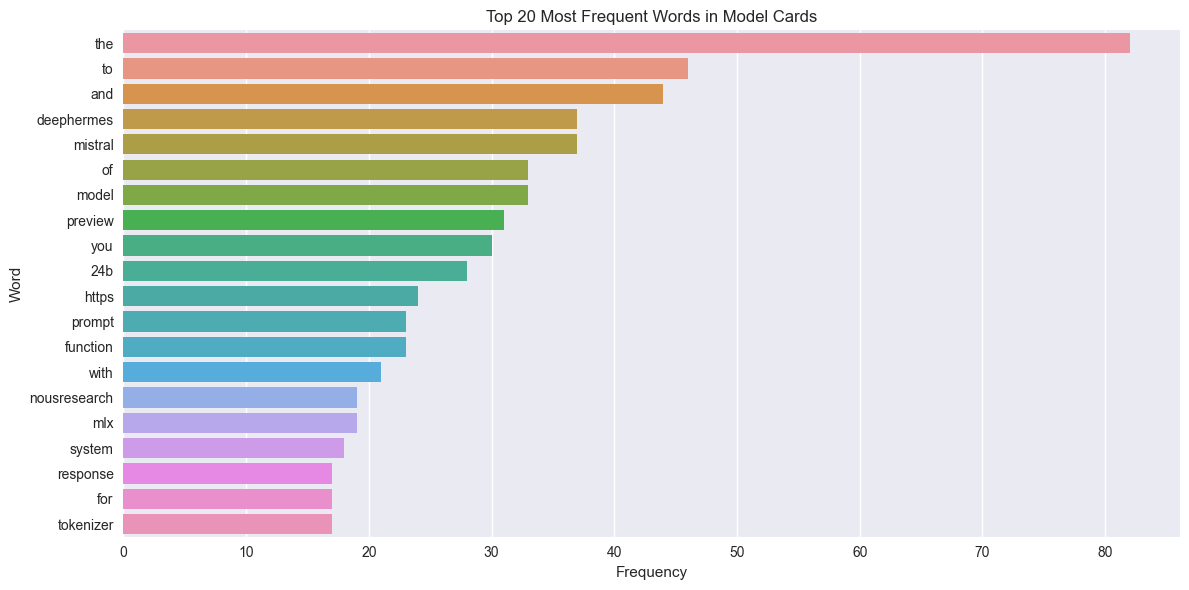

In [6]:
# Plot top 20 words
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq.head(20), x='count', y='word')
plt.title('Top 20 Most Frequent Words in Model Cards')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

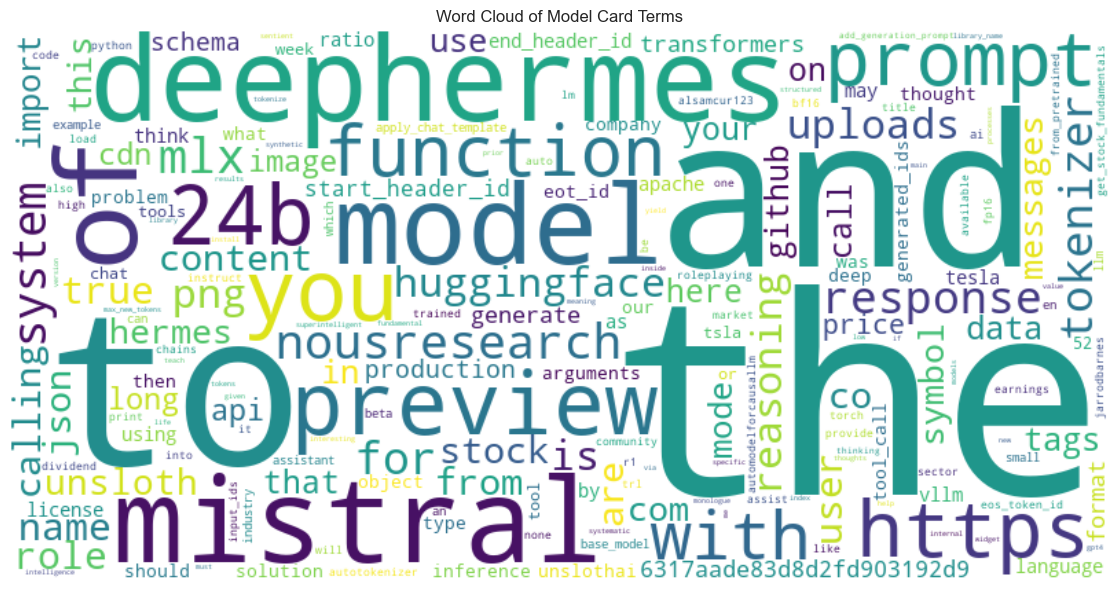

In [7]:
# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(word_freq['word'], word_freq['count']))
)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Model Card Terms')
plt.tight_layout()
plt.show()

## Analysis by Model Type

In [9]:
# Extract model type from model_id
df['model_type'] = df['model_id'].apply(lambda x: x.split('/')[-1].split('-')[0] if isinstance(x, str) else '')

# Group by model type and analyze word frequencies
model_types = df['model_type'].unique()
for model_type in model_types:
    if model_type:  # Skip empty model types
        type_data = df[df['model_type'] == model_type]
        if len(type_data) > 0:
            X_type = vectorizer.transform(type_data['card'])
            word_counts_type = X_type.sum(axis=0).A1
            
            word_freq_type = pd.DataFrame({
                'word': feature_names,
                'count': word_counts_type
            }).sort_values('count', ascending=False)
            
            print(f"\nTop 10 words for {model_type} models:")
            print(word_freq_type.head(10))


Top 10 words for DeepHermes models:
           word  count
493         the     82
503          to     46
53          and     44
143  deephermes     37
313     mistral     37
347          of     33
318       model     33
384     preview     31
570         you     30
12          24b     28


# Measure the semantic similarity between model cards